In [1]:
import selenium.webdriver as wb
from selenium.webdriver.common.action_chains import ActionChains
import time
import numpy as np
import datetime
import uuid

In [2]:
class Spider(object):

    def get_mac_address(self):  # 查看本机的mac地址,以此作为判断是在本地还是远端运行的本程序.
        str_MAC = uuid.UUID(int=uuid.getnode()).hex[-12:]
        return ":".join(str_MAC[e:e+2] for e in range(0, 11, 2))

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        mac_pc_dict = {}
        mac_pc_dict.update({'mac_desktop': 'b8:8a:60:9c:7b:4b'})
        mac_pc_dict.update({'mac_pc_lan': '58:96:1d:b7:f7:22'})
        mac_pc_dict.update({'mac_lab_lan': '9c:7b:ef:3e:84:0a'})
        mac_pc_dict.update({'mac_lab_wlan': '5c:ba:ef:7c:35:8e'})
        mac_pc_dict.update({'mac_miner_lan': '00:e0:70:ad:8c:6d'})
        mac_current = self.get_mac_address()
        print('当前设备mac地址为：', mac_current)
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if mac_current not in mac_pc_dict.values():
            option.headless = True
            print('非PC端程序运行，设置为无窗口模式')
        else:
            if display == False:
                option.headless = True
                print('PC端程序运行，设置为无窗口模式')
            else:
                print('PC端程序运行，设置为有窗口模式')

        # 手机端初始化
        if mac_current not in mac_pc_dict.values():
            option.add_argument(
                'user-agent=Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.103 Safari/537.36')
            print('Spider initialing\nUser-Agent=Mozilla/5.0')
            self.driver = wb.Chrome(
                r"/usr/lib/chromium-browser/chromedriver", options=option)
        else:  # PC端初始化
            # 浏览器驱动器初始化，需指明路径与参数
            option.binary_location = r"C:\Program Files\Google\Chrome\Application\chrome.exe"
            # 上句话可能报错，后边根据每台设备的chrome安装地址来改
            if mac_current == mac_pc_dict['mac_desktop']:
                self.driver = wb.Chrome(
                    r"C:\Users\Ruby\Desktop\workspace\assets\chromedriver.exe", options=option)
            elif mac_current == mac_pc_dict['mac_pc_lan'] or mac_current == mac_pc_dict['mac_miner_lan']:
                self.driver = wb.Chrome(
                    r"C:\Users\Ludy\Desktop\workspace\assets\chromedriver.exe", options=option)
            elif mac_current == mac_pc_dict['mac_lab_lan'] or mac_current == mac_pc_dict['mac_lab_wlan']:
                self.driver = wb.Chrome(
                    r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)
            else:
                pass
            # sony服务器上用的是2k分辨率的浏览器，方便一口气看更多的内容
            self.driver.set_window_rect(width=2560, height=1440)
            self.driver.set_window_size(width=2560, height=1440)
        self.driver.implicitly_wait(30)

        print('Spider initialed')

    def isElementPresent(self, by, value):
        # 从selenium.common.exceptions模块导入NoSuchElementException异常类
        from selenium.common.exceptions import NoSuchElementException
        try:
            element = self.driver.find_element(by=by, value=value)
        except NoSuchElementException as e:
            # 打印异常信息
            # print(e)
            # 发生了NoSuchElementException异常，说明页面中未找到该元素，返回False
            return False
        else:
            # 没有发生异常，表示在页面中找到了该元素，返回True
            return True

    def random_sleep(self, delay=3):
        # 用numpy的随机数
        tmp = np.random.random()
        # 使用time.sleep来让进程暂停
        time.sleep(delay*(tmp+0.5))


In [3]:
def get2018_up100(spider: Spider):
    spider.driver.get(
        r'https://www.bilibili.com/blackboard/activity-BPU2018.html')
    output_path = '2018up100.txt'
    ans = []
    for i in range(2, 52):
        x_elm = spider.driver.find_element_by_xpath(
            rf'/html/body/div[2]/div[{i}]/div/div[3]/div/div/div/p/span/strong')
        y_elm = spider.driver.find_element_by_xpath(
            rf'/html/body/div[2]/div[{i}]/div/div[6]/div/div/div/p/span/strong')
        ans.append(x_elm.text)
        ans.append(y_elm.text)
    with open(output_path, 'w', encoding='utf-8') as f:
        for i in range(len(ans)):
            f.write(ans[i]+'\n')


In [4]:
def get2019_up100(spider: Spider):
    spider.driver.get(
        r'https://www.bilibili.com/blackboard/activity-BPU2019.html#/stage3')
    # 页面加载差不多的时候  需要手动往下滑鼠标  帮助爬虫加载下网页
    button_elm = spider.driver.find_element_by_xpath(
        '/html/body/div[1]/div/div[2]/section[2]/button')
    button_elm.click()
    output_path = '2019up100.txt'
    ans = []
    for i in range(1, 101):
        x_elm = spider.driver.find_element_by_xpath(
            rf'/html/body/div[3]/div/div[2]/ul/li[{i}]/h2')
        ans.append(x_elm.text)
    with open(output_path, 'w', encoding='utf-8') as f:
        for i in range(len(ans)):
            f.write(ans[i]+'\n')


In [5]:
def get2020_up100(spider: Spider):
    spider.driver.get(r'https://www.bilibili.com/BPU2020#/poweruplist')
    output_path = '2020up100.txt'
    ans = []
    for i in range(1, 101):
        x_elm = spider.driver.find_element_by_xpath(
            rf'/html/body/div/div/div[2]/div[3]/div[2]/div[2]/ul/li[{i}]/div[1]/div/p')
        ans.append(x_elm.text)
    with open(output_path, 'w', encoding='utf-8') as f:
        for i in range(len(ans)):
            f.write(ans[i]+'\n')


In [6]:
def get_kanbilibili(spider: Spider):
    spider.driver.get('https://www.kanbilibili.com/rank/ups/fans')
    output_path = 'kanbilibili.txt'
    ans = []
    for k in range(2, 14):
        if k==12:
            continue
        spider.driver.find_element_by_xpath(
            f'/html/body/div[1]/div/div[3]/div[1]/div[1]/a[{k}]').click()
        spider.random_sleep(3)
        for i in range(1, 101):
            elm: wb.remote.webdriver.WebElement = spider.driver.find_element_by_xpath(
                f'/html/body/div[1]/div/div[3]/div[2]/a[{i}]')
            ans.append(elm.get_attribute('href').rsplit('/', 1)[-1])
    with open(output_path, 'w', encoding='utf-8') as f:
        for i in range(len(ans)):
            f.write(ans[i]+'\n')


In [7]:
worker = Spider()
get2018_up100(worker)
get2019_up100(worker)
get2020_up100(worker)
get_kanbilibili(worker)

当前设备mac地址为： 00:e0:70:ad:8c:6d
PC端程序运行，设置为有窗口模式
Spider initialed


In [13]:
def init_csv(filepath='test.csv'):
    headers = ['UP昵称', '会员等级', '会员类别', '关注', '粉丝', '获赞', '播放', '生日', '投稿']
    with open(filepath, 'w', newline='', encoding='utf-8')as f:
        f_csv = csv.writer(f)
        f_csv.writerow(headers)

In [12]:
def write_csv(filepath,datas):
    with open(filepath, 'a+', newline='',encoding='utf-8')as f:
        f_csv = csv.writer(f)
        try:
            f_csv.writerow(datas)
        except:
            print('Error while saving!')

In [14]:
def read_uid(filepath):
    x = []
    with open(filepath, 'r', newline='', encoding='utf-8')as f:
        csv_read = csv.reader(f)
        for line in csv_read:
            line[0] = re.findall('\d+', line[0])[0]
            x.append(line[0])
    return x

In [10]:
class Spider(object):

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if display == False:
            option.headless = True
            print('程序运行，设置为无窗口模式')


# Chrome程序地址改这里
        option.binary_location = r"C:\Program Files\Google\Chrome\Application\chrome.exe"
        # 浏览器驱动器初始化，需指明路径与参数
# Chrome驱动器地址改这里，改try里的那个就行
        try:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy\Desktop\workspace\assets\chromedriver.exe", options=option)
        except:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)

    def login(self):
        self.driver.get('https://space.bilibili.com/'+'51896064')
        self.random_sleep(2)
        login_elm = self.driver.find_element_by_css_selector(
            '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        login_elm.click()
        wds = self.driver.window_handles
        self.driver.switch_to_window(wds[-1])
        self.random_sleep(2)
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')


################################
        # 账号密码改这里
        username_elm.send_keys('********')
        password_elm.send_keys('********')
        self.random_sleep(1)
        login2_elm.click()
        # 8秒的时间进行人机结合登录=_=
        time.sleep(12)

    def random_sleep(self, delay=3):
        tmp = np.random.random()
        time.sleep(delay*(tmp+0.5))

    def fetch_by_UID(self, UID='51896064'):
        self.driver.get('https://space.bilibili.com/'+UID)
        self.random_sleep(3)

        up_name_elm = self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name = up_name_elm.text

        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text

        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text

        birthday = 'None'
        try:
            birthday = self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 > div.section.user > div.info > div.content > div > div > div.item.birthday > span.text').text
        except:
            pass
        print(birthday)

        up_tougao_elm = self.driver.find_element_by_css_selector(
            '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num')
        tougao = up_tougao_elm.text
        shipin = 'Error'
        try:

            up_tougao_elm = self.driver.find_element_by_css_selector(
                '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-text')
            up_tougao_elm.click()

            self.random_sleep(3)
            up_shipin_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li.contribution-item.cur > span')
            shipin = up_shipin_elm.text
            up_yinpin_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(2) > span')
            yinpin = up_yinpin_elm.text
            up_zhuanlan_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(3) > span')
            zhuanlan = up_zhuanlan_elm.text

        except:
            print('Error is coming!')
            # input()
        if shipin != 'Error':
            tougao = str(int(shipin)+int(yinpin)+int(zhuanlan))
        print(tougao)
        self.random_sleep(2)
        return (up_name, up_level, up_member, up_follow, up_followby, up_getzan, up_numofplay, birthday, tougao)


In [15]:
# 用来保存爬虫结果的文件是下面这个，可以不新建
csv_path = r'.\bilibli_ups_test.csv'
# 用来读取UID列表的csv文件是这个，excel要先另存为成csv，并且不要有标题行
# uid_path = r'.\UID100.csv'
# uid_list = read_uid(uid_path)
uid_path = r'.\kanbilibili.txt'
uid_list = []
with open(uid_path, 'r', encoding='utf-8') as f:
    x = f.readlines()
    for i in range(len(x)):
        uid_list.append(x[i].rsplit('\n', 1)[0])
# print(uid_list)

worker = Spider(display=True)
try:
    worker.login()
except:
    print('登录失败')
    time.sleep(10)
    exit()

try:
    init_csv(csv_path)
except:
    pass

for i in range(min(20,len(uid_list))):
    try:
        data = worker.fetch_by_UID(uid_list[i])
        write_csv(csv_path, data)
        print('*'*20+'\n', i, 'success')
    except:
        # input()
        print('*'*20+'\n', i, 'error')
time.sleep(10)

<ipython-input-10-0134107b25aa>:35: DeprecationWarning: use driver.switch_to.window instead
  self.driver.switch_to_window(wds[-1])


LexBurner
6
年度大会员
34
943.6万
5158.2万
10.5亿
11-22
392
********************
 0 error
凉风Kaze
6
年度大会员
13
765.5万
8727.4万
9.1亿
11-27
340
********************
 1 error
努力的Lorre
6
年度大会员
134
371.6万
1816.5万
4.9亿
06-11
382
********************
 2 error
哔哩哔哩会员购
6
十年大会员
158
425万
2183.9万
1013.4万
09-19
2126
********************
 3 error
泛式
6
年度大会员
372
344.3万
1904.9万
2.5亿
02-10
180
********************
 4 error
瓶子君152
6
年度大会员
105
264.8万
1245.6万
2.2亿
11-29
187
********************
 5 error
★⑥檤轮囬★
6
年度大会员
46
232.3万
978.9万
2.4亿
None
545
********************
 6 error
阿幕降临
6
年度大会员
33
194万
1140.8万
1.8亿
None
84
********************
 7 error
神楽七奈Official
6
年度大会员
89
169.2万
996.9万
4627.1万
01-12
115
********************
 8 error
鲁过一世
6
年度大会员
146
142.7万
440万
9978万
01-01
88
********************
 9 error
尕丶天堂
6
年度大会员
184
137.3万
513.6万
1.3亿
03-22
445
********************
 10 error
AIChannel官方
6
年度大会员
5
125.8万
1106.8万
1.6亿
06-30
1550
********************
 11 error
丸子叨叨叨
6
年度大会员
250
137.2万
1525万
1.7亿
07-23
262
********

In [1]:
import pandas as pd
import time

In [2]:
with open('2018up100.txt', mode='r', encoding='utf-8') as f:
    up2018 = f.readlines()
with open('2019up100.txt', mode='r', encoding='utf-8') as f:
    up2019 = f.readlines()
with open('2020up100.txt', mode='r', encoding='utf-8') as f:
    up2020 = f.readlines()
up = []
updic = {}
up += up2018 + up2019 + up2020
for i in range(len(up)):
    tp: str = up[i]
    tp = tp.rsplit('\n', 1)[0]
    up[i] = tp
    updic.update({f'{i}': tp})

In [3]:
updic

{'0': 'A路人',
 '1': 'hanser',
 '2': 'hey信誓蛋蛋',
 '3': 'ilem',
 '4': 'KBShinya',
 '5': 'LexBurner',
 '6': 'nya酱的一生',
 '7': 'OELoop',
 '8': 'papi酱',
 '9': 'STN工作室',
 '10': 'Vivekatt',
 '11': '阿斗归来了',
 '12': '爱做饭的芋头SAMA',
 '13': '敖厂长',
 '14': '茶几君梦二',
 '15': '茶理理理子',
 '16': '潮汕好男人',
 '17': '吃素的狮子',
 '18': '抽风叔',
 '19': '纯黑老贼',
 '20': '大胃王密子君',
 '21': '倒悬的橘子',
 '22': '逗川kshadow',
 '23': '嘟督不噶油',
 '24': '泛式',
 '25': '尕丶天堂',
 '26': '孤独的美食基',
 '27': '还有一天就放假了',
 '28': '黑镖客梦回',
 '29': '黑椒墨鱼',
 '30': '黑桐谷歌',
 '31': '花花与三猫CatLive',
 '32': '花少北丶',
 '33': '活蹦乱跳的肥曈',
 '34': '机智的党妹',
 '35': '极客湾',
 '36': '杰里德Jared',
 '37': '敬汉卿',
 '38': '酒客小丑',
 '39': '聚印象视频',
 '40': '靠脸吃饭的徐大王',
 '41': '科技美学',
 '42': '拉草莓的西瓜JUN',
 '43': '老番茄',
 '44': '凉风Kaze',
 '45': '泠鸢yousa',
 '46': '刘哔电影',
 '47': '刘老师说电影',
 '48': '曼食慢语',
 '49': '芒果冰OL',
 '50': '面筋哥-程书林',
 '51': '墨韵Moyun',
 '52': '某幻君',
 '53': '木鱼水心',
 '54': '努巴尼守望先锋',
 '55': '努力的Lorre',
 '56': '女孩为何穿短裙',
 '57': '哦漏QAQ',
 '58': '怕上火暴王老菊',
 '59': '排骨教主',
 '60': '瓶子君1

In [4]:
data: pd.DataFrame = pd.read_csv('bilibli_ups.csv')
data.insert(data.shape[1], '100up', 0)
print(updic)
for i in range(data.shape[0]):
    print(data['UP昵称'][i], end=' ')
    if data['UP昵称'][i] in updic.values():
        print('True')
        data['100up'][i] = True
    else:
        print('False')
        data['100up'][i] = False
data.to_csv('./add100up.csv', encoding='utf-8-sig')

{'0': 'A路人', '1': 'hanser', '2': 'hey信誓蛋蛋', '3': 'ilem', '4': 'KBShinya', '5': 'LexBurner', '6': 'nya酱的一生', '7': 'OELoop', '8': 'papi酱', '9': 'STN工作室', '10': 'Vivekatt', '11': '阿斗归来了', '12': '爱做饭的芋头SAMA', '13': '敖厂长', '14': '茶几君梦二', '15': '茶理理理子', '16': '潮汕好男人', '17': '吃素的狮子', '18': '抽风叔', '19': '纯黑老贼', '20': '大胃王密子君', '21': '倒悬的橘子', '22': '逗川kshadow', '23': '嘟督不噶油', '24': '泛式', '25': '尕丶天堂', '26': '孤独的美食基', '27': '还有一天就放假了', '28': '黑镖客梦回', '29': '黑椒墨鱼', '30': '黑桐谷歌', '31': '花花与三猫CatLive', '32': '花少北丶', '33': '活蹦乱跳的肥曈', '34': '机智的党妹', '35': '极客湾', '36': '杰里德Jared', '37': '敬汉卿', '38': '酒客小丑', '39': '聚印象视频', '40': '靠脸吃饭的徐大王', '41': '科技美学', '42': '拉草莓的西瓜JUN', '43': '老番茄', '44': '凉风Kaze', '45': '泠鸢yousa', '46': '刘哔电影', '47': '刘老师说电影', '48': '曼食慢语', '49': '芒果冰OL', '50': '面筋哥-程书林', '51': '墨韵Moyun', '52': '某幻君', '53': '木鱼水心', '54': '努巴尼守望先锋', '55': '努力的Lorre', '56': '女孩为何穿短裙', '57': '哦漏QAQ', '58': '怕上火暴王老菊', '59': '排骨教主', '60': '瓶子君152', '61': '起小点是大腿', '62': '千户长生', '63': '浅澄月', '64': '日食记官方

SNH48官方账号 False
保持围笑好难呢 False
嘻咦啊说 False
张艺兴B站投喂总支部 False
这里是KOKO False
有机星期一 False
老弱病残字幕组_OFFICIAL False
T-EGG茶蛋字幕组 False
哔计划 False
翦瞳秋 False
反正不是字幕组 False
猫眼电影官方 False
ZYPark False
东京不够热字幕组 False
王祖蓝 False
芒果TV False
MOMEI_肖战视频收集站 False
我就这出息 False
NCT中文首站 False
不爱吃榴莲 False
开开你开门啊 False
1断水流大师兄 False
韩语养乐多老师 False
秋爸是奶爸 False
Lynnzzy False
东方卫视番茄台 False
我是艺术_ False
末日鸡蛋黄字幕组 False
张艺兴工作室 False
橘子娱乐 False
CenturyBlue百年唯蓝 False
GOT7百度贴吧 False
GP81每日KPOP False
帝玖i False
六月没头 False
EXO吧字幕组 False
乐视自制 False
bili_27937261 False
塔罗师白羽 False
All_about_觉醒东方 False
希西卡酱 False
不胜寒 False
WANJINNY-LIN False
KendallJenner False
樱井牌垫肩 False
WINNER_BAR False
GDTOP百度知道团队 False
彼岸的PLAYROOM False
创造营视频收集站 False
森森俄语控~ False
爱笑的小女孩6 False
Kiwi是个字幕君 False
WANNAONE厨房用品开发部 False
FANTASY精 False
梧桐半死清霜後 False
新时代的美人胚子 False
_变态少女 False
一勺茉绿酱 False


<ipython-input-4-7566b63e49a7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['100up'][i] = True
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-4-7566b63e49a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['100up'][i] = False


In [5]:
data

,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿,100up
0,LexBurner,6,年度大会员,34,943.2万,5155.8万,10.5亿,11-22,392,True
1,凉风Kaze,6,年度大会员,13,765.2万,8724.6万,9.1亿,11-27,340,True
2,努力的Lorre,6,年度大会员,134,371.2万,1814.8万,4.8亿,06-11,382,True
3,哔哩哔哩会员购,6,十年大会员,158,424.8万,2180.8万,1012.5万,09-19,2126,False
4,泛式,6,年度大会员,372,343.7万,1903.1万,2.5亿,02-10,180,True
...,...,...,...,...,...,...,...,...,...,...
1088,FANTASY精,6,NaN,1,12.8万,41.6万,1713.8万,None,176,False
1089,梧桐半死清霜後,6,NaN,22,10.1万,80.9万,7136.4万,01-01,8678,False
1090,新时代的美人胚子,6,年度大会员,5,11.6万,209.3万,5307.8万,09-14,333,False
1091,_变态少女,6,NaN,0,12.9万,12.7万,4877.9万,None,176,False


In [8]:
i = -1
while True:
    i += 1
    if i > data.shape[0]:
        break
    try:
        if '万' in data['粉丝'][i]:
            data['粉丝'][i] = str(float(data['粉丝'][i].split('万')[0])*10000)
        if '亿' in data['粉丝'][i]:
            data['粉丝'][i] = str(
                float(data['粉丝'][i].split('亿')[0])*100000000)
        if '万' in data['获赞'][i]:
            data['获赞'][i] = str(float(data['获赞'][i].split('万')[0])*10000)
        if '亿' in data['获赞'][i]:
            data['获赞'][i] = str(
                float(data['获赞'][i].split('亿')[0])*100000000)
        if '万' in data['播放'][i]:
            data['播放'][i] = str(float(data['播放'][i].split('万')[0])*10000)
        if '亿' in data['播放'][i]:
            data['播放'][i] = str(
                float(data['播放'][i].split('亿')[0])*100000000)
        data['投稿'][i] = str(int(data['投稿'][i]))
        if '哔哩哔哩' in data['UP昵称'][i]:
            data.drop(axis=0, index=i, inplace=True)
            continue
    except:
        data.to_csv('error.csv', encoding='utf-8-sig')
        # input()
        data.drop(axis=0, index=i, inplace=True)
        continue

data.index = range(len(data))
data.to_csv('./datawashed.csv', encoding='utf-8-sig')

<ipython-input-8-9dfbcfe5a09d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['投稿'][i] = str(int(data['投稿'][i]))
<ipython-input-8-9dfbcfe5a09d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['粉丝'][i] = str(float(data['粉丝'][i].split('万')[0])*10000)
<ipython-input-8-9dfbcfe5a09d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['播放'][i] = str(float(data['播放'][i].split('万')[0])*10000)
<ipython-input-8-9dfbcfe5a09d>:13

KeyError: '[1078] not found in axis'

In [9]:
data

,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿,100up
0,LexBurner,6,年度大会员,34,9432000.0,51558000.0,1050000000.0,11-22,392,True
1,凉风Kaze,6,年度大会员,13,7652000.0,87246000.0,910000000.0,11-27,340,True
2,努力的Lorre,6,年度大会员,134,3712000.0,18148000.0,480000000.0,06-11,382,True
3,泛式,6,年度大会员,372,3437000.0,19031000.0,250000000.0,02-10,180,True
4,瓶子君152,6,年度大会员,105,2645000.0,12408000.0,210000000.0,11-29,186,True
...,...,...,...,...,...,...,...,...,...,...
1073,FANTASY精,6,NaN,1,128000.0,416000.0,17138000.0,None,176,False
1074,梧桐半死清霜後,6,NaN,22,101000.0,809000.0,71364000.0,01-01,8678,False
1075,新时代的美人胚子,6,年度大会员,5,116000.0,2093000.0,53078000.0,09-14,333,False
1076,_变态少女,6,NaN,0,129000.0,127000.0,48779000.0,None,176,False


In [31]:
for i in range(len(data)):
    if '万' in data['粉丝'][i]:
        print(i)

In [10]:
data.insert(data.shape[1], '平均播放', 0)
data.insert(data.shape[1], '平均获赞', 0)
for i in range(data.shape[0]):
    try:
        tmp = int(data['投稿'][i])
        data['平均播放'][i] = float(data['播放'][i]) / tmp
        data['平均获赞'][i] = float(data['获赞'][i]) / tmp
    except:
        pass

data.to_csv('./final.csv', encoding='utf-8-sig')

<ipython-input-10-43ac9192ace0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['平均播放'][i] = float(data['播放'][i]) / tmp
<ipython-input-10-43ac9192ace0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['平均获赞'][i] = float(data['获赞'][i]) / tmp


In [11]:
data

,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿,100up,平均播放,平均获赞
0,LexBurner,6,年度大会员,34,9432000.0,51558000.0,1050000000.0,11-22,392,True,2678571,131525
1,凉风Kaze,6,年度大会员,13,7652000.0,87246000.0,910000000.0,11-27,340,True,2676470,256605
2,努力的Lorre,6,年度大会员,134,3712000.0,18148000.0,480000000.0,06-11,382,True,1256544,47507
3,泛式,6,年度大会员,372,3437000.0,19031000.0,250000000.0,02-10,180,True,1388888,105727
4,瓶子君152,6,年度大会员,105,2645000.0,12408000.0,210000000.0,11-29,186,True,1129032,66709
...,...,...,...,...,...,...,...,...,...,...,...,...
1073,FANTASY精,6,NaN,1,128000.0,416000.0,17138000.0,None,176,False,97375,2363
1074,梧桐半死清霜後,6,NaN,22,101000.0,809000.0,71364000.0,01-01,8678,False,8223,93
1075,新时代的美人胚子,6,年度大会员,5,116000.0,2093000.0,53078000.0,09-14,333,False,159393,6285
1076,_变态少女,6,NaN,0,129000.0,127000.0,48779000.0,None,176,False,277153,721


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [8]:
data = pd.read_csv('final.csv')
data

,Unnamed: 0,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿,100up,平均播放,平均获赞
0,0,LexBurner,6,年度大会员,34,9432000.0,51558000.0,1.050000e+09,11-22,392,True,2678571,131525
1,1,凉风Kaze,6,年度大会员,13,7652000.0,87246000.0,9.100000e+08,11-27,340,True,2676470,256605
2,2,努力的Lorre,6,年度大会员,134,3712000.0,18148000.0,4.800000e+08,06-11,382,True,1256544,47507
3,3,泛式,6,年度大会员,372,3437000.0,19031000.0,2.500000e+08,02-10,180,True,1388888,105727
4,4,瓶子君152,6,年度大会员,105,2645000.0,12408000.0,2.100000e+08,11-29,186,True,1129032,66709
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,FANTASY精,6,NaN,1,128000.0,416000.0,1.713800e+07,None,176,False,97375,2363
1074,1074,梧桐半死清霜後,6,NaN,22,101000.0,809000.0,7.136400e+07,01-01,8678,False,8223,93
1075,1075,新时代的美人胚子,6,年度大会员,5,116000.0,2093000.0,5.307800e+07,09-14,333,False,159393,6285
1076,1076,_变态少女,6,NaN,0,129000.0,127000.0,4.877900e+07,None,176,False,277153,721


<AxesSubplot:xlabel='投稿', ylabel='Count'>

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31295 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 31295 missing from current font.
  font.set_text(s, 0, flags=flags)


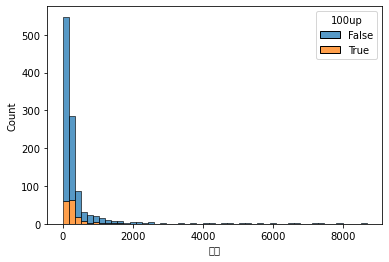

In [11]:
sns.histplot(data=data,x='投稿',hue='100up',bins=50,multiple='stack')

In [14]:
data.insert(data.shape[1],'zone',0)
for i in range(len(data)):
    data['zone'][i] = i//100

<ipython-input-14-815db734581f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['zone'][i] = i//100


In [15]:
data

,Unnamed: 0,UP昵称,会员等级,会员类别,关注,粉丝,获赞,播放,生日,投稿,100up,平均播放,平均获赞,zone
0,0,LexBurner,6,年度大会员,34,9432000.0,51558000.0,1.050000e+09,11-22,392,True,2678571,131525,0
1,1,凉风Kaze,6,年度大会员,13,7652000.0,87246000.0,9.100000e+08,11-27,340,True,2676470,256605,0
2,2,努力的Lorre,6,年度大会员,134,3712000.0,18148000.0,4.800000e+08,06-11,382,True,1256544,47507,0
3,3,泛式,6,年度大会员,372,3437000.0,19031000.0,2.500000e+08,02-10,180,True,1388888,105727,0
4,4,瓶子君152,6,年度大会员,105,2645000.0,12408000.0,2.100000e+08,11-29,186,True,1129032,66709,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,FANTASY精,6,NaN,1,128000.0,416000.0,1.713800e+07,None,176,False,97375,2363,10
1074,1074,梧桐半死清霜後,6,NaN,22,101000.0,809000.0,7.136400e+07,01-01,8678,False,8223,93,10
1075,1075,新时代的美人胚子,6,年度大会员,5,116000.0,2093000.0,5.307800e+07,09-14,333,False,159393,6285,10
1076,1076,_变态少女,6,NaN,0,129000.0,127000.0,4.877900e+07,None,176,False,277153,721,10


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33719 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36190 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 33719 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 36190 missing from current font.
  font.set_text(s, 0, flags=flags)


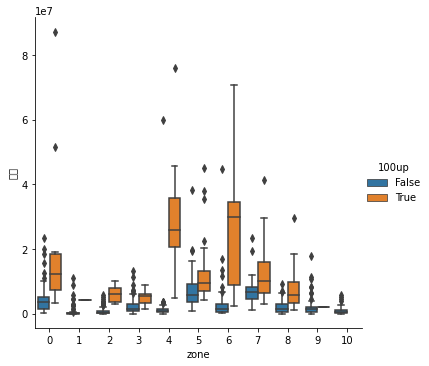

In [17]:
sns.catplot(data=data,x='zone',y='获赞',kind='box',hue='100up')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25773 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25918 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25773 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 25918 missing from current font.
  font.set_text(s, 0, flags=flags)


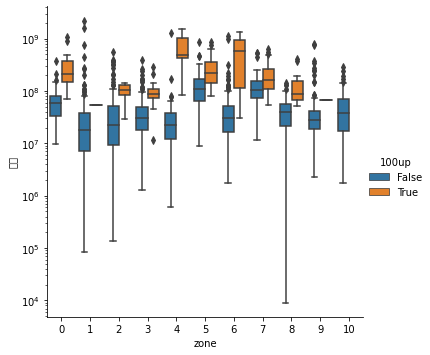

In [27]:
ax = sns.catplot(data=data,x='zone',y='播放',kind='box',hue='100up')
ax.set(yscale='log')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 22343 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33719 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36190 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 24179 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 22343 missing from cur

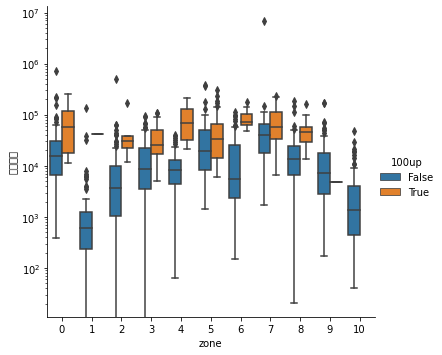

In [26]:
# plt.yscale('log')
ax = sns.catplot(data=data,x='zone',y='平均获赞',kind='box',hue='100up')
ax.set(yscale='log')